# Lab Two: Images!
## Caleb Moore, Christian Gould, and Blake Gebhardt

Data Source: https://www.kaggle.com/datasets/gpreda/chinese-mnist

In [49]:
# Imports
import pandas as pd
import numpy as np
from PIL import Image
import os

In [50]:
# Notebook setup
from IPython.display import HTML
HTML('''<script>
code_show_err=false; 
function code_toggle_err() {
 if (code_show_err){
 $('div.output_stderr').hide();
 } else {
 $('div.output_stderr').show();
 }
 code_show_err = !code_show_err
} 
$( document ).ready(code_toggle_err);
</script>
To toggle on/off output_stderr, click <a href="javascript:code_toggle_err()">here</a>.''')

# 💰 Business Understanding (2 points total).
* Give an overview of the dataset. Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). What is the prediction task for your dataset and which third parties would be interested in the results? Why is this data important? Once you begin modeling, how well would your prediction algorithm need to perform to be considered useful to the identified third parties? Be specific and use your own words to describe the aspects of the data. 

### Purpose of the Dataset
* The purpose of the dataset is to be able to read and recognize an image of a chineese number, and be able to predict what number it is. This is important because it can be used to help with reading and recognizing numbers from a language that people in America are not very familiar with, and could possibly be used and generalized to other languages.

### Prediction Task
* The prediction task is exactly what the dataset was originally collected for. We want to be able to predict the numbers that are in the images.

### Third Parties
* The third parties that would be interested in the results would be anyone who is a foreigner in china and wants to be able to read and recognize chinese numbers, possibly for paying for services or buying things.

# 📊 Data Preparation

In [51]:
# convert an image name to a python array
def conv_img_name_to_array(img_name):
  returnArr = []

  # Remove the .jpg extension
  img_name = img_name[:-4]

  # Split the string by underscore
  img_name = img_name.split('_')

  returnArr.append(int(img_name[1]))
  returnArr.append(int(img_name[2]))
  returnArr.append(int(img_name[3]))

  return returnArr

* [.5 points] Read in your images as numpy arrays. Resize and recolor images as necessary.

In [52]:
# Function to convert an image to a 1 dimensional array, given the image path
def conv_img_to_array(img_path):
    img = Image.open(img_path)
    img_array = np.array(img)

    # Flatten the array
    img_array = img_array.flatten()
    return img_array

* [.4 points] Linearize the images to create a table of 1-D image features (each row should be one image).   

In [53]:
def conv_data_folder_to_df(dataFolderPath):

    # Make a list of all the column names for the dataframe
    colNames = ['suite_id', 'sample_id', 'code']
    for i in range(4096):
        colNames.append('pixel_' + str(i))

    # Create an empty list to store the image arrays
    img_array_list = []

    # Loop over all the images in the folder
    for img_path in os.listdir(dataFolderPath):
        # Convert the image to a 1 dimensional array
        img_array = conv_img_to_array(dataFolderPath + img_path)

        # Get the suite_id, sample_id, and code from the image name
        img_name = conv_img_name_to_array(img_path)

        # Add the suite_id, sample_id, and code to the front of the array
        img_array = np.append(img_name, img_array)

        # Add it to the list
        img_array_list.append(img_array)

    # Convert the list to a dataframe
    img_df = pd.DataFrame(img_array_list, columns=colNames)
    return img_df

* [.1 points] Visualize several images.

In [54]:
# Given a flattened array of pixel values, display the image
def visualize_array(img_array):
    # Reshape the array to 64x64
    img_array = img_array.reshape(64, 64)

    # Convert the array to an image
    img = Image.fromarray(img_array)

    # Display the image
    display(img)

array form:  [0 0 0 ... 0 0 0]


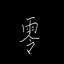

In [55]:
# Visualize an image
img_1 = 'data/input_1_1_1.jpg'
img_1_arr = conv_img_to_array(img_1)
print("array form: ", img_1_arr)
visualize_array(img_1_arr)

array form:  [0 0 0 ... 0 0 0]


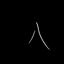

In [56]:
# Visualize another image
img_2 = 'data/input_74_8_9.jpg'
img_2_arr = conv_img_to_array(img_2)
print("array form: ", img_2_arr)
visualize_array(img_2_arr)

array form:  [0 0 0 ... 0 0 0]


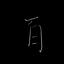

In [57]:
# Visualize a final image
img_3 = 'data/input_100_4_12.jpg'
img_3_arr = conv_img_to_array(img_3)
print("array form: ", img_3_arr)
visualize_array(img_3_arr)

### Read in our data

In [58]:
# Convert the data folder to a dataframe
data_df = conv_data_folder_to_df('./data/')
data_df.head()

,suite_id,sample_id,code,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,...,pixel_4086,pixel_4087,pixel_4088,pixel_4089,pixel_4090,pixel_4091,pixel_4092,pixel_4093,pixel_4094,pixel_4095
0,69,2,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,11,7,12,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,81,4,10,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,84,6,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,36,3,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Take a brief look at the data

In [59]:
print('data shape', data.shape)
print()
num_vars = data.columns [data.dtypes != 'object']
cat_vars = data.columns [data.dtypes == 'object']
print ('numerical:', num_vars.values)
print()
print('categorical:', cat_vars.values)
data.dtypes

data shape (15000, 5)

numerical: ['suite_id' 'sample_id' 'code' 'value']

categorical: ['character']


suite_id      int64
sample_id     int64
code          int64
value         int64
character    object
dtype: object

### [1.5 points] Data Reduction 👌: 
<span style="color:red">
[.5 points] Perform linear dimensionality reduction of the images using principal components analysis. Visualize the explained variance of each component. Analyze how many dimensions are required to adequately represent your image data. Explain your analysis and conclusion.
</span>

<span style="color:red">
[.5 points] Perform linear dimensionality reduction of your image data using randomized principle components analysis. Visualize the explained variance of each component. Analyze how many dimensions are required to adequately represent your image data. Explain your analysis and conclusion.
</span>

<span style="color:red">
[2 points]  Compare the representation using PCA and Randomized PCA. The method you choose to compare dimensionality methods should quantitatively explain which method is better at representing the images with fewer components.  Do you prefer one method over another? Why?
</span>

<span style="color:red">
[1 points] Perform feature extraction upon the images using DAISY. Try different parameters for your image data.
</span>

<span style="color:red">
[2 points] Does this feature extraction method show promise for your prediction task? Why?
</span>

<span style="color:red">
* Use visualizations to analyze this questions. For example, use a heat map of the pairwise differences (ordered by class) among all extracted features. Another option, build a nearest neighbor classifier to see actual classification performance.  
</span>

# Exceptional Work (1 points total)
<span style="color:red">
(0.4) The overall quality of the report as a coherent, useful, and polished product will be reflected here. Does it make sense overall? Do your visualizations answer the questions you put forth in your business analysis? Do you properly and consistently cite sources and annotate changes made to base code? Do you provide specific reasons for your assumptions? Do subsequent questions follow naturally from initial exploration?
</span>


<span style="color:red">
(0.6) Additional analysis
(5000 level) You have free rein to provide any additional analyses and visualizations appropriate to your data.
</span>